Given the time-note pairs in `./wav_processed/` create labels for LSTM in `./spectrogram/`

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# save as spectrogram

def generate_label(filename):
    sound_id = filename[-20:-4]
    time_note_array = np.load(filename)
    time_array, note_array = np.transpose(time_note_array)    
    
#     time_note_array = np.array(sorted(time_note_array, key=lambda x: x[0]))
    
    labels = np.zeros((280,24))
    for i,entry in enumerate(time_note_array):
        time, note = entry
        time_slice = int((time*44100/(27*2**7))//1)
        labels[time_slice, int(note)] = 1
        
#     plt.figure(figsize=(12,12))
#     plt.imshow(labels)
    
    np.save("./label/" + filename[-20:-4], labels)

5


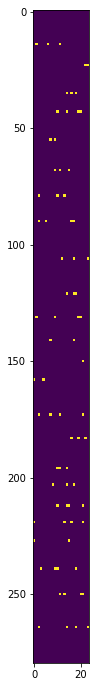

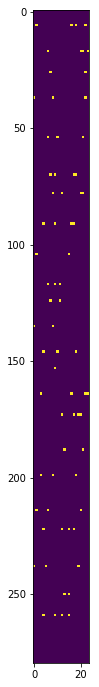

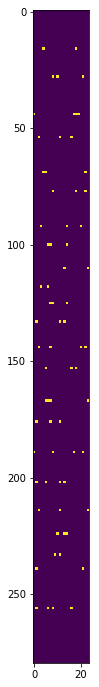

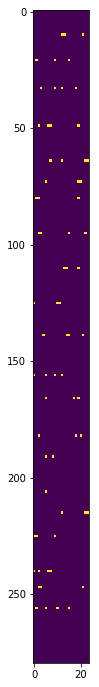

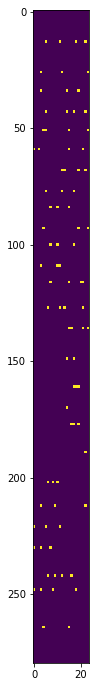

In [6]:
import glob

notes = glob.glob("./notes/*")
print(len(notes))

for filename in notes:
#     sound_id = filename[-20:-4]
#     time_note_array = np.load(filename)
#     time_array, note_array = np.transpose(time_note_array)
    generate_label(filename)